# Wines Review Analysis

In [2]:
#Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import re
import scipy.stats as st


In [40]:
# Original data had to be manipulated to be able to upload "starter" dataset to GitHub
# Dropped description and designation from original 130K csv to create "dropped_wine_data.csv"

# Import refined "starter" data
wines_csv = "dropped_wine_data.csv"
wine_df = pd.read_csv(wines_csv)
wine_df.head()

,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [41]:
# Look at what we are starting with

print([wine_df.count()])


[Unnamed: 0     129971
country        129908
points         129971
price          120975
province       129908
region_1       108724
region_2        50511
taster_name    103727
title          129971
variety        129970
winery         129971
dtype: int64]


In [ ]:
# Drop unneeded columns
wine_df3 = wine_df.drop(['Unnamed: 0' , 'region_2'], axis=1)
wine_df3.count()

In [ ]:
# Drop any NaN records we have in data at this point
clean_wine_df3 = wine_df3.dropna()
clean_wine_df3

In [ ]:
# extract year from column title
clean_wine_df3_yr = clean_wine_df3.copy()

for index, row in clean_wine_df3_yr.iterrows():
    if len(''.join(filter(lambda i: i.isdigit(), clean_wine_df3_yr['title'][index]))) == 4:
        clean_wine_df3_yr.loc[index, 'year'] = ''.join(filter(lambda i: i.isdigit(), clean_wine_df3_yr['title'][index]))

print([clean_wine_df3_yr.count()])
# reclean data for any new NaN and drop any duplicates
reclean_wine_df3_yr = clean_wine_df3_yr.dropna()
reclean_wine_df3_yr = reclean_wine_df3_yr.drop_duplicates(subset=None, keep='first', inplace=False)
reclean_wine_df3_yr = reclean_wine_df3_yr.reset_index()
print([reclean_wine_df3_yr.count()])
print([reclean_wine_df3_yr['year'].min()])
print([reclean_wine_df3_yr['year'].max()])

In [ ]:
# Simply naming and delete unneeded columns before export
CWD = reclean_wine_df3_yr.copy()
CWD = CWD.drop(['index'], axis=1)

# Export CSV for any other people working on data
output_data_file = "clean_wine_data.csv"
CWD.to_csv(output_data_file, encoding='utf-8', index=False)

In [3]:
# if restarting kernel uncomment these lines to not have to reclean the original data.
clean_wine_data_csv = "clean_wine_data.csv"
CWD = pd.read_csv(clean_wine_data_csv)

# Look at what we we have to work with
CWD

,country,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
1,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
2,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
3,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
4,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
...,...,...,...,...,...,...,...,...,...,...
66091,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
66092,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
66093,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
66094,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


[province
Alsace               1644
Andalucia              38
Arizona                 8
Australia Other       143
Beaujolais            740
                     ... 
Vermont                 2
Victoria              244
Virginia              325
Washington           7508
Western Australia     233
Name: points, Length: 61, dtype: int64]
[province
California            17242
Washington             7508
Oregon                 4704
Bordeaux               3651
Northern Spain         3339
Tuscany                2921
Mendoza Province       2824
Burgundy               2802
New York               2184
Piedmont               1879
Alsace                 1644
Loire Valley           1362
Southwest France       1167
Northeastern Italy     1053
South Australia        1029
Provence                973
Rhône Valley            919
Veneto                  784
Beaujolais              740
Sicily & Sardinia       718
Name: points, dtype: int64]
[61]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020252C1BB88>],
      dtype=object)

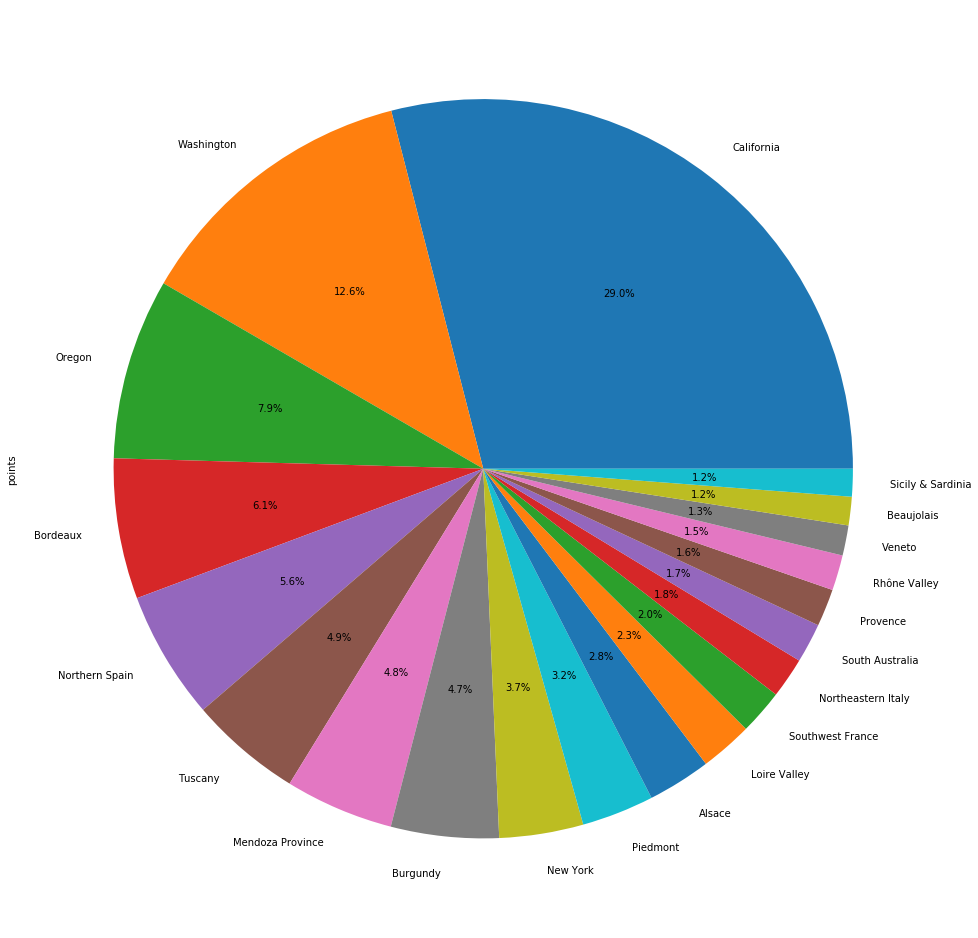

In [4]:
# See percentage of review by province/state for top 20
cwd_prov = CWD.groupby('province')
cwd_prov_count = cwd_prov['points'].count()

print([cwd_prov_count])
print([cwd_prov_count.sort_values(ascending=False).head(20)])
print([len(cwd_prov_count.index)])

# Create pie plot of top 20 types by count of all wines
t20_cwd_prov_count = cwd_prov_count.sort_values(ascending=False).head(20)
t20_cwd_prov_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

[country
Argentina     3292
Australia     1737
Canada         186
France       14597
Italy         8724
Spain         5297
US           32263
Name: points, dtype: int64]
[country
US           32263
France       14597
Italy         8724
Spain         5297
Argentina     3292
Australia     1737
Canada         186
Name: points, dtype: int64]
[7]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020258C359C8>],
      dtype=object)

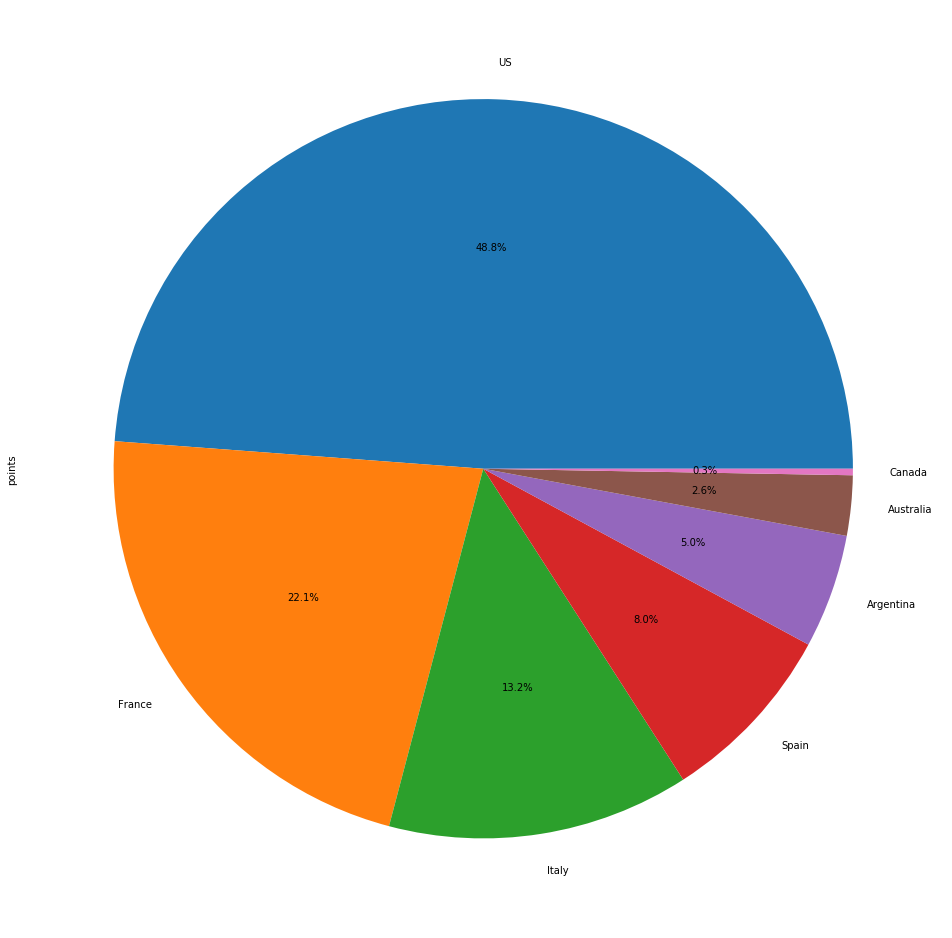

In [5]:
# See percentage of review by country for top 20
cwd_cntry = CWD.groupby('country')
cwd_cntry_count = cwd_cntry['points'].count()

print([cwd_cntry_count])
print([cwd_cntry_count.sort_values(ascending=False).head(20)])
print([len(cwd_cntry_count.index)])

# Create pie plot of top 20 types by count of CA wines
t20_cwd_cntry_count = cwd_cntry_count.sort_values(ascending=False).head(20)
t20_cwd_cntry_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

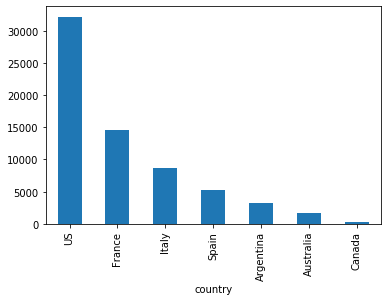

In [42]:
t20_cwd_cntry_count.plot.bar()

In [6]:
# Create df for CA wines
clean_ca_wines = CWD.loc[CWD['province'] == "California"]
clean_ca_wines

,country,points,price,province,region_1,taster_name,title,variety,winery,year
7,US,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011
9,US,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2012
10,US,87,12.0,California,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,2012
18,US,87,22.0,California,Paso Robles,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,2011
20,US,87,69.0,California,Sonoma Coast,Virginie Boone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,2011
...,...,...,...,...,...,...,...,...,...,...
66078,US,90,20.0,California,Mendocino County,Virginie Boone,Apriori 2013 Chardonnay (Mendocino County),Chardonnay,Apriori,2013
66079,US,90,35.0,California,Sonoma County,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,2010
66081,US,90,20.0,California,Santa Ynez Valley,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2013
66084,US,90,35.0,California,Napa Valley,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,2013


In [7]:
# create df for all wines
clean_gbl_wines = CWD.copy()
clean_gbl_wines

,country,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
1,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
2,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
3,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
4,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
...,...,...,...,...,...,...,...,...,...,...
66091,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
66092,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
66093,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
66094,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [8]:
# create df for all wines excluding CA wines
clean_gbl_wines_noca = clean_gbl_wines.loc[clean_gbl_wines['province'] != "California"]
clean_gbl_wines_noca

,country,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
1,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
2,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
3,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
4,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
...,...,...,...,...,...,...,...,...,...,...
66091,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
66092,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
66093,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
66094,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


[variety
Pinot Noir                  3497
Chardonnay                  2394
Cabernet Sauvignon          2311
Zinfandel                   1321
Red Blend                    918
Sauvignon Blanc              880
Syrah                        876
Merlot                       480
Petite Sirah                 368
Bordeaux-style Red Blend     353
Rosé                         302
Rhône-style Red Blend        294
Grenache                     236
Viognier                     229
Cabernet Franc               188
White Blend                  174
Barbera                      138
Sangiovese                   133
Sparkling Blend              130
Malbec                       122
Name: title, dtype: int64]

There are 164 varietal types of wine reviewed from Califonrina

This is a breakdown of the top 20 by count of reviews


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202586ABF88>],
      dtype=object)

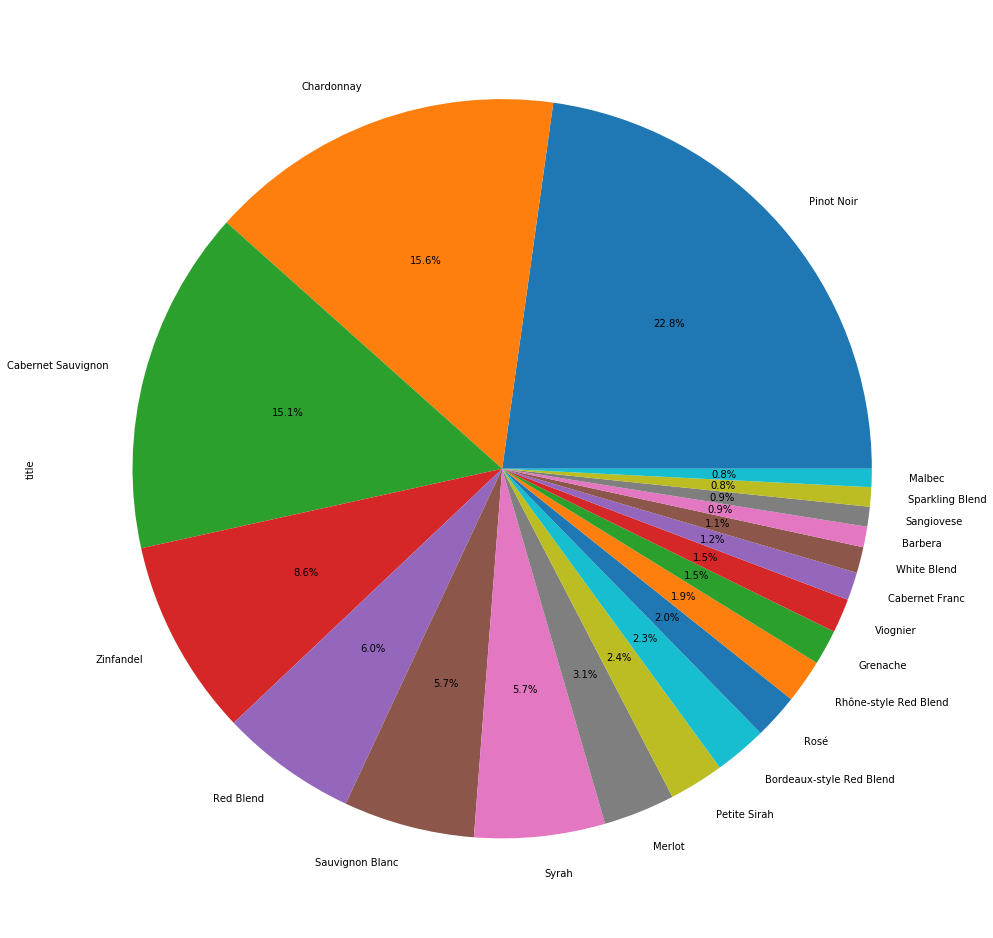

In [9]:
#ordered list of types and counts of CA wines
ca_varietal = clean_ca_wines.groupby('variety')
ca_type_count = ca_varietal['title'].count()
print([ca_type_count.sort_values(ascending=False).head(20)])
print()
print(f'There are {len(ca_type_count.index)} varietal types of wine reviewed from Califonrina')
print()
# Create pie plot of top 20 types by count of CA wines
print('This is a breakdown of the top 20 by count of reviews')
t20_ca_type_count = ca_type_count.sort_values(ascending=False).head(20)
t20_ca_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')


[variety
Pinot Noir                  7664
Chardonnay                  6325
Red Blend                   5062
Cabernet Sauvignon          4501
Bordeaux-style Red Blend    4149
Syrah                       2350
Rosé                        2283
Malbec                      2093
Riesling                    2063
Sauvignon Blanc             2050
Sangiovese                  1619
Nebbiolo                    1578
Tempranillo                 1506
Merlot                      1477
Zinfandel                   1390
White Blend                 1120
Rhône-style Red Blend       1076
Pinot Gris                  1045
Cabernet Franc               906
Gamay                        720
Name: title, dtype: int64]

There are 456 varietal types of wine reviewed from All over the world

This is a breakdown of the top 20 by count of reviews


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202586AA608>],
      dtype=object)

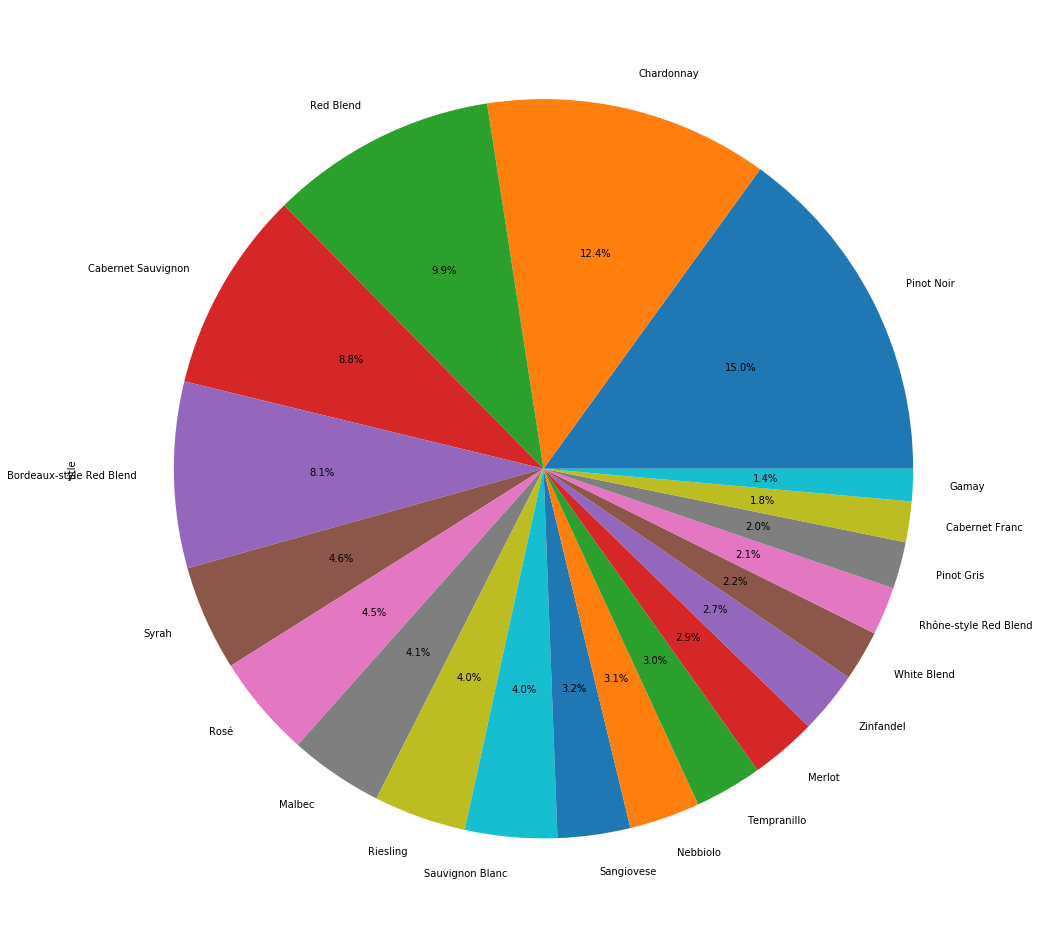

In [10]:
#ordered list of types and counts of Global wines including CA
gbl_varietal = clean_gbl_wines.groupby('variety')
gbl_type_count = gbl_varietal['title'].count()
print([gbl_type_count.sort_values(ascending=False).head(20)])
print()
print(f'There are {len(gbl_type_count.index)} varietal types of wine reviewed from All over the world')
print()
# Create pie plot of top 20 types by count of Global wines including CA
print('This is a breakdown of the top 20 by count of reviews')
t20_gbl_type_count = gbl_type_count.sort_values(ascending=False).head(20)
t20_gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

[variety
Pinot Noir                  4167
Red Blend                   4144
Chardonnay                  3931
Bordeaux-style Red Blend    3796
Cabernet Sauvignon          2190
Rosé                        1981
Malbec                      1971
Riesling                    1941
Nebbiolo                    1556
Sangiovese                  1486
Syrah                       1474
Tempranillo                 1421
Sauvignon Blanc             1170
Merlot                       997
White Blend                  946
Pinot Gris                   945
Rhône-style Red Blend        782
Gamay                        720
Cabernet Franc               718
Gewürztraminer               624
Name: title, dtype: int64]

There are 432 varietal types of wine reviewed from every else besides Califonrina

This is a breakdown of the top 20 by count of reviews


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020258BD2408>],
      dtype=object)

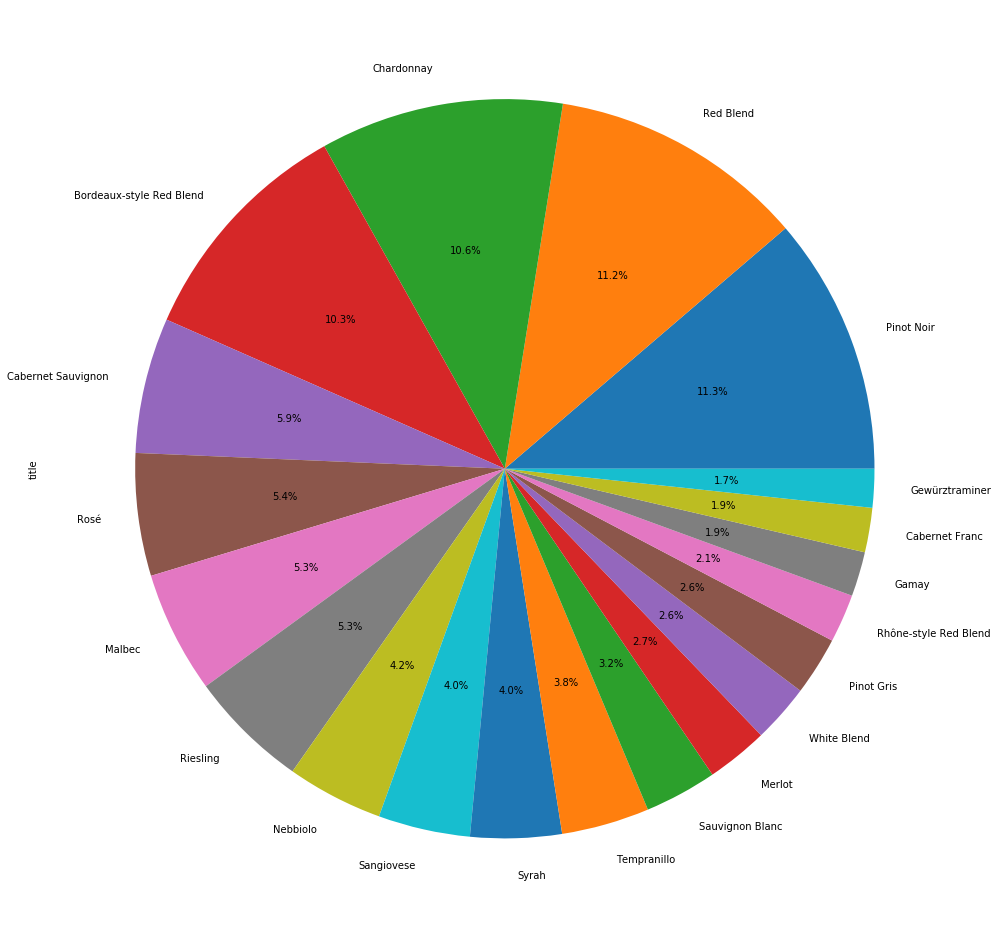

In [11]:
#ordered list of types and counts of Global wines without CA
noca_gbl_varietal = clean_gbl_wines_noca.groupby('variety')
noca_gbl_type_count = noca_gbl_varietal['title'].count()
print([noca_gbl_type_count.sort_values(ascending=False).head(20)])
print()
print(f'There are {len(noca_gbl_type_count.index)} varietal types of wine reviewed from every else besides Califonrina')
print()
# Create pie plot of top 20 types by count of Global wines without CA
print('This is a breakdown of the top 20 by count of reviews')
t20_noca_gbl_type_count = noca_gbl_type_count.sort_values(ascending=False).head(20)
t20_noca_gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

In [12]:
# bargraph by year by count CA
ca_count_yr = clean_ca_wines.groupby('year')
ca_count_yr.points.count()

year
1990       1
1991       1
1992       1
1996       3
1997      28
1998      85
1999       5
2000       6
2001       2
2002       1
2003       4
2004       5
2005       4
2006      27
2007     104
2008     200
2009     406
2010     818
2011    1269
2012    3575
2013    4651
2014    3820
2015    1655
2016     571
Name: points, dtype: int64

In [13]:
# bargraph by year by count nonCA
gbl_count_yr = clean_gbl_wines_noca.groupby('year')
gbl_count_yr.points.count()

year
1607       1
1821       2
1827       2
1847       1
1872       1
1882       1
1887       2
1904       1
1919       1
1927       2
1945       1
1947       1
1970       2
1978       1
1982       1
1985       2
1986       1
1988       1
1989       1
1990       1
1992       3
1993       2
1994       2
1995       7
1996      24
1997      49
1998     185
1999     228
2000     248
2001     210
2002     155
2003     168
2004     472
2005    1178
2006    1698
2007    2056
2008    2456
2009    3591
2010    4656
2011    5152
2012    6608
2013    6333
2014    6922
2015    4679
2016    1740
2017       6
Name: points, dtype: int64

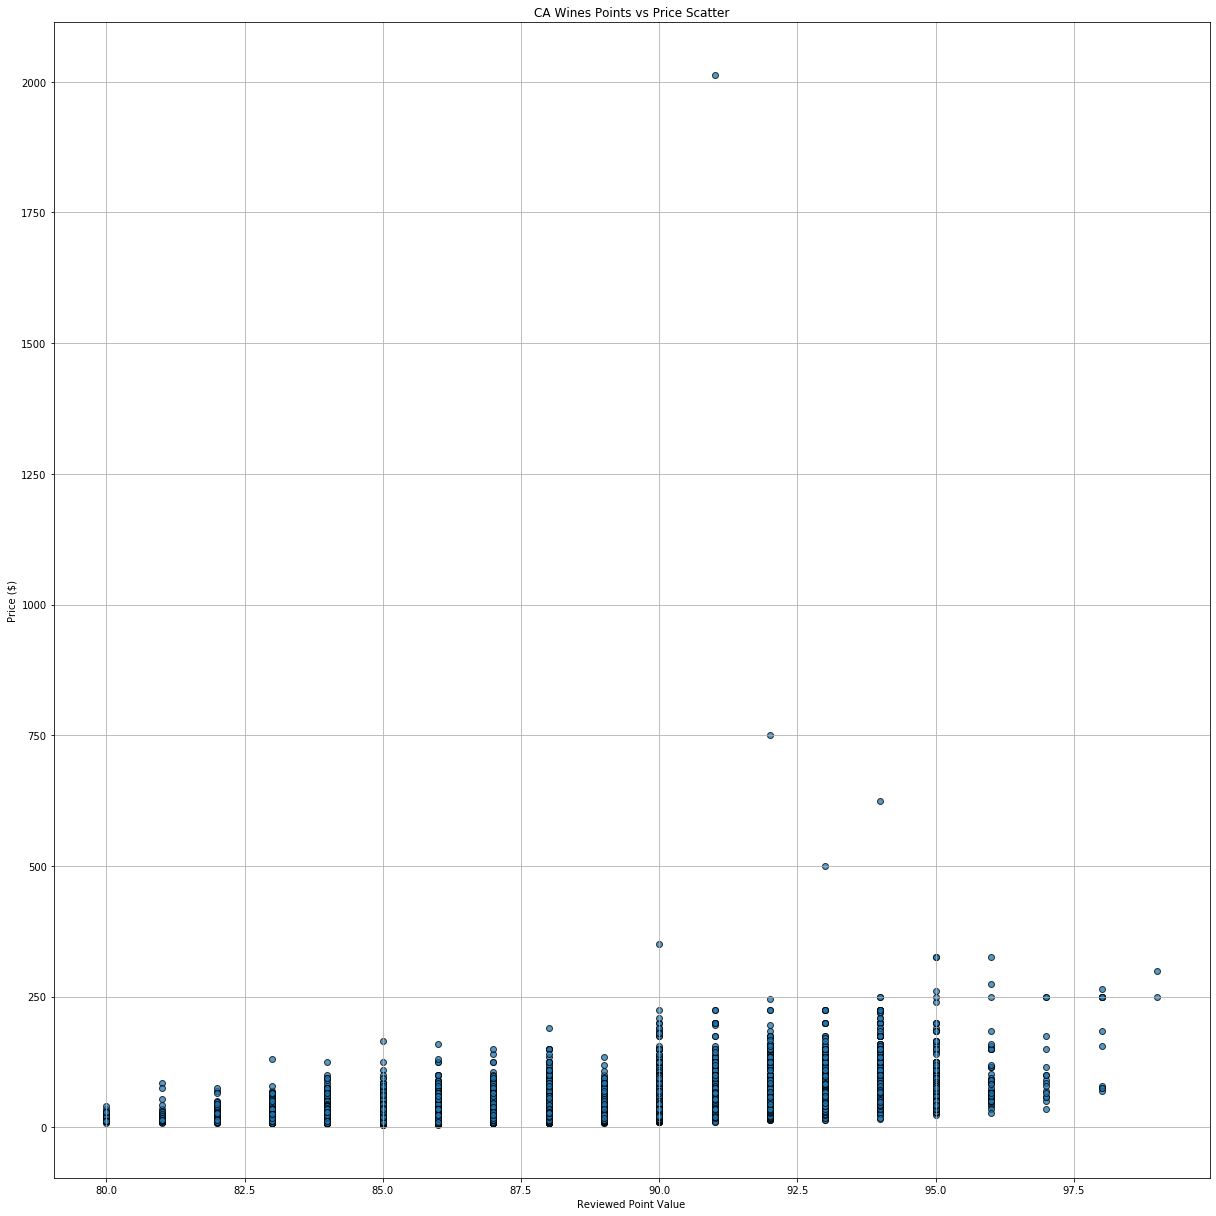

In [14]:
# points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_ca_wines['points'], clean_ca_wines['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"CA Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.39 for CA Wines


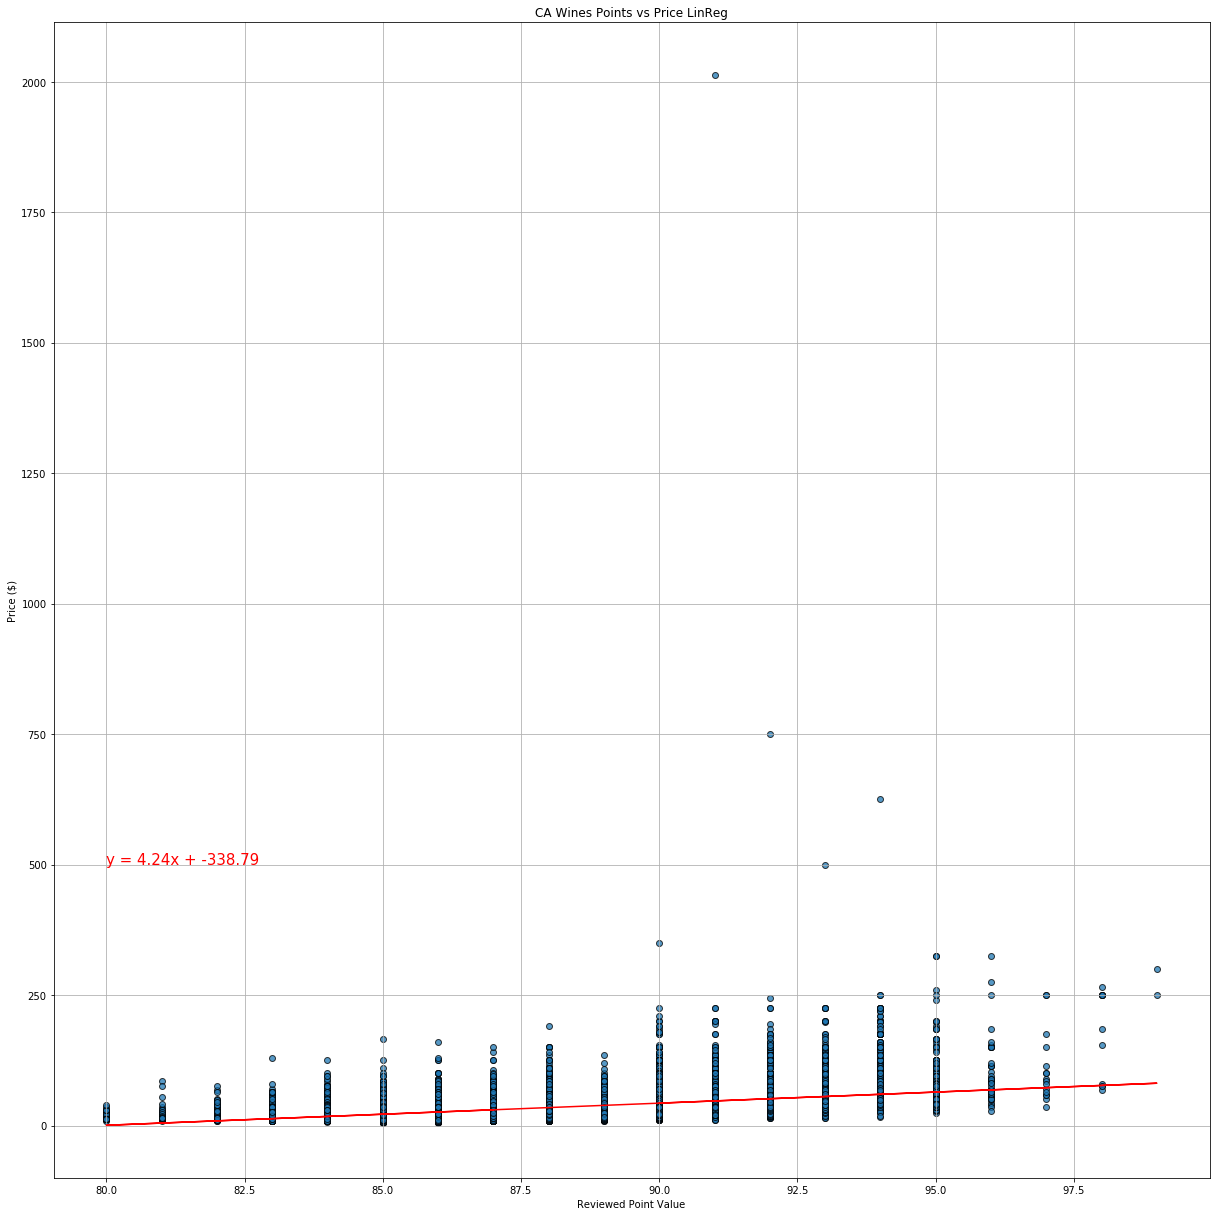

In [15]:
x_values = clean_ca_wines['points'].astype(float)
y_values = clean_ca_wines['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(st.pearsonr(x_values,y_values)[0],2)} for CA Wines")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"CA Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,500),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

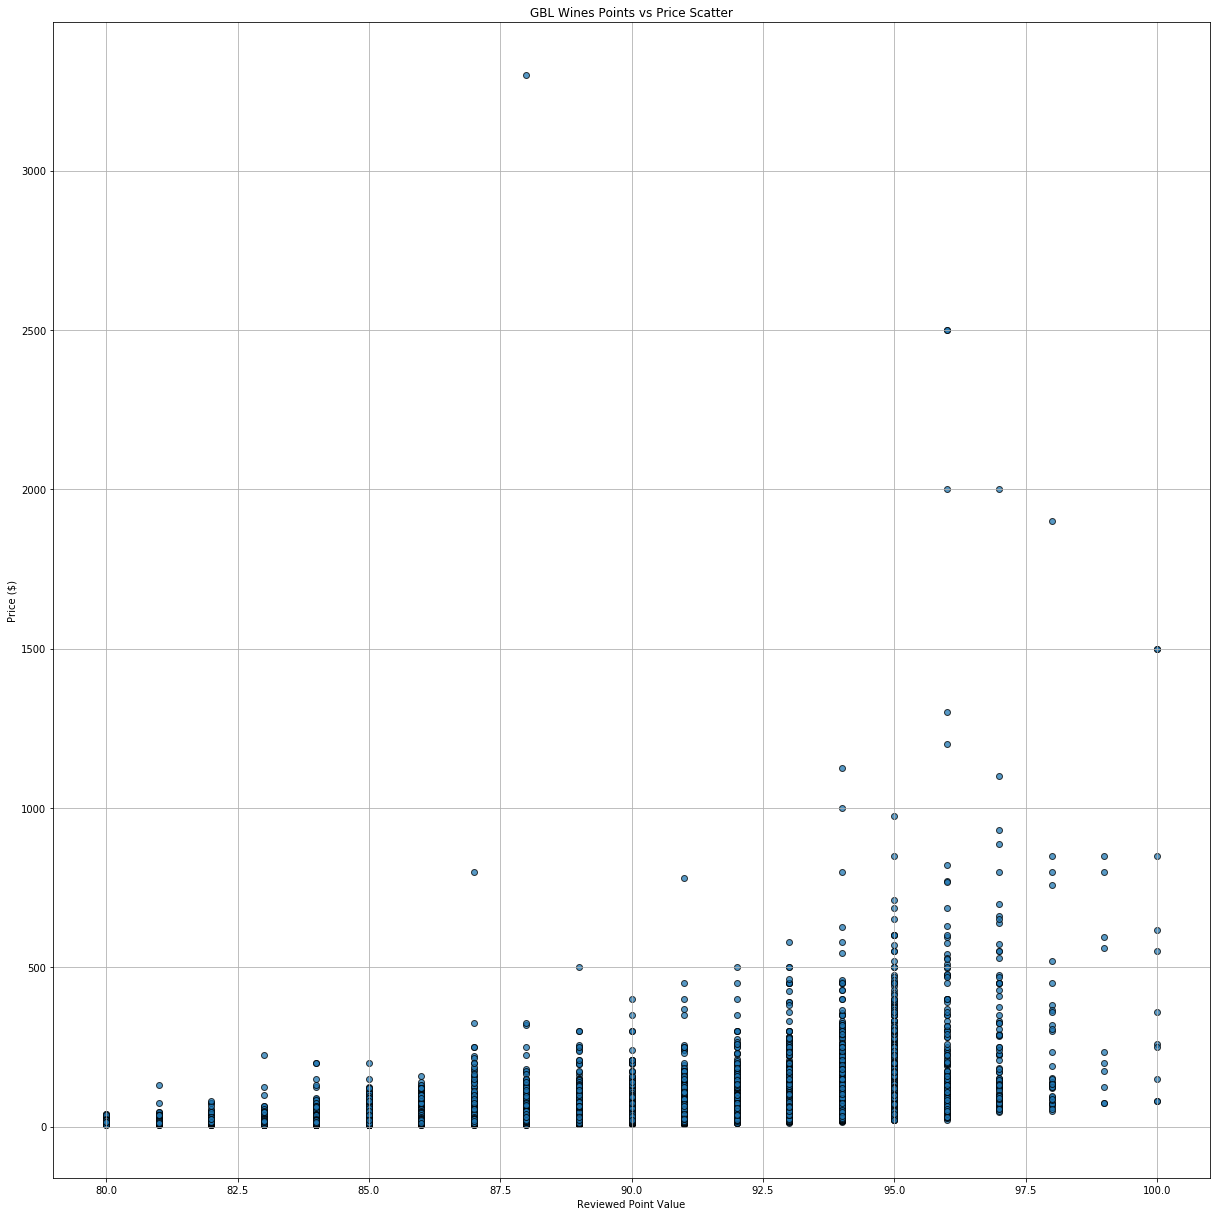

In [16]:
# GBL no CA points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_gbl_wines_noca['points'], clean_gbl_wines_noca['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"GBL Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.4 for GBL Wines not from CA


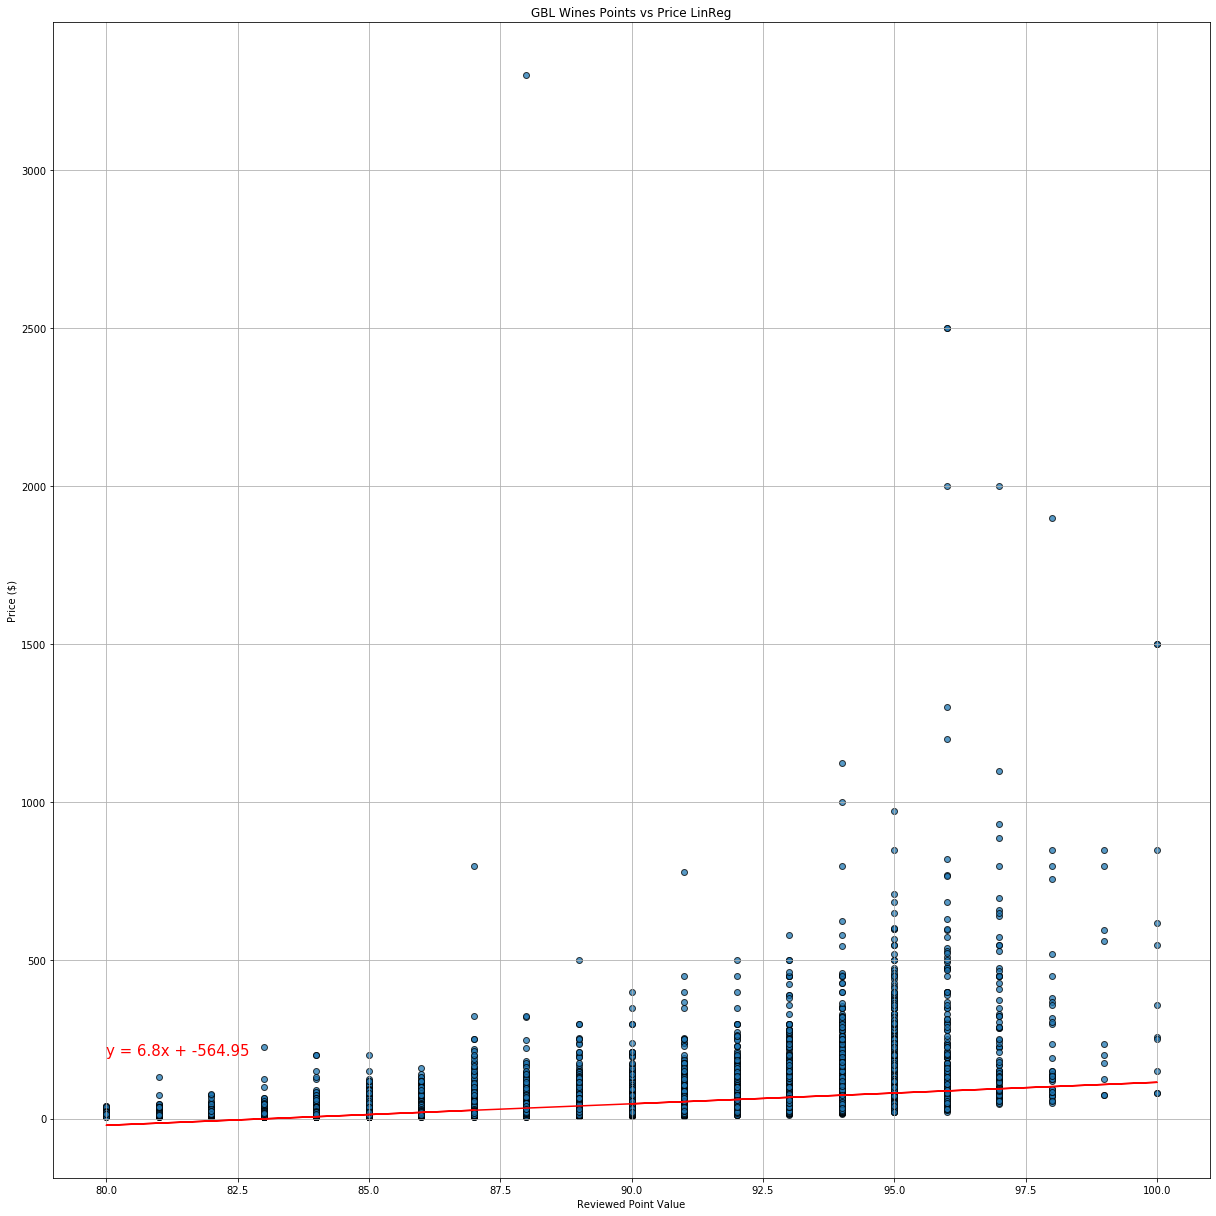

In [17]:
x_values = clean_gbl_wines_noca['points'].astype(float)
y_values = clean_gbl_wines_noca['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(st.pearsonr(x_values,y_values)[0],2)} for GBL Wines not from CA")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"GBL Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,200),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [18]:
good_value_wines = clean_gbl_wines.loc[(clean_gbl_wines['price'] <= 20) & (clean_gbl_wines['points'] >= 94)]
good_value_wines

,country,points,price,province,region_1,taster_name,title,variety,winery,year
2806,US,95,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham,2010
3519,US,94,18.0,Washington,Yakima Valley,Paul Gregutt,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle,2011
8256,France,95,20.0,Southwest France,Madiran,Roger Voss,Alain Brumont 2010 Château Bouscassé Red (Madi...,Red Blend,Alain Brumont,2010
9475,US,94,20.0,Washington,Yakima Valley,Paul Gregutt,Brian Carter Cellars 2009 Opulento Dessert Win...,Port,Brian Carter Cellars,2009
9856,France,94,20.0,Provence,Coteaux d'Aix-en-Provence,Roger Voss,Château Vignelaure 2016 Rosé (Coteaux d'Aix-en...,Rosé,Château Vignelaure,2016
10479,Spain,94,14.0,Andalucia,Jerez,Michael Schachner,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne,1827
11107,France,94,20.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2011 White (Alsace),White Blend,Domaine Marcel Deiss,2011
14215,Italy,94,20.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,Le Casematte 2014 Peloro Red (Terre Siciliane),Red Blend,Le Casematte,2014
17319,US,94,20.0,Oregon,Chehalem Mountains,Paul Gregutt,Timothy Malone 2016 Medici Vineyard Riesling (...,Riesling,Timothy Malone,2016
21178,France,94,18.0,Southwest France,Jurançon,Roger Voss,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,Domaine Cauhapé,2011


In [59]:
good_value_wines_prov = good_value_wines.groupby('province')
good_value_wines_prov['winery'].count()

province
Alsace                1
Andalucia             1
Beaujolais            1
California            2
Oregon                2
Provence              1
Sicily & Sardinia     1
South Australia       1
Southwest France      4
Veneto                1
Washington           12
Name: winery, dtype: int64

In [61]:
WA_good_value_wines = good_value_wines.loc[good_value_wines['province'] == 'Washington']
WA_good_value_wines

Base_url = 'https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input='
winery_search =  {WA_good_value_wines['winery'][0]}+" winery "+ {WA_good_value_wines['province'][0]}
url_tail = '&inputtype=textquery&fields=formatted_address,name,rating,geometry'
Museum%20of%20Contemporary%20Art%20Australia&inputtype=textquery&fields=formatted_address,name,rating,geometry&key=YOUR_API_KEY

,country,points,price,province,region_1,taster_name,title,variety,winery,year
2806,US,95,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham,2010
3519,US,94,18.0,Washington,Yakima Valley,Paul Gregutt,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle,2011
9475,US,94,20.0,Washington,Yakima Valley,Paul Gregutt,Brian Carter Cellars 2009 Opulento Dessert Win...,Port,Brian Carter Cellars,2009
28982,US,94,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Poet's Leap 2012 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap,2012
31428,US,94,20.0,Washington,Red Mountain,Paul Gregutt,Guardian 2012 Angel Sauvignon Blanc (Red Mount...,Sauvignon Blanc,Guardian,2012
36528,US,94,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Dunham 2009 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham,2009
40047,US,95,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Januik 2012 Bacchus Vineyard Riesling (Columbi...,Riesling,Januik,2012
45608,US,94,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Dunham 2011 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham,2011
45609,US,94,20.0,Washington,Yakima Valley,Paul Gregutt,Kevin White 2011 La Fraternité Red (Yakima Val...,Rhône-style Red Blend,Kevin White,2011
47353,US,94,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Poet's Leap 2007 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap,2007


In [19]:
# top 10 province by avg price
# See percentage of review by province/state for top 20
### Using cwd_prov = CWD.groupby('province') from above

cwd_prov_mean = cwd_prov['price'].mean().round(2)

print([cwd_prov_mean])
print()
print('The top 10 most expensive to least expensive provinces/states reviewed were:')
print([cwd_prov_mean.sort_values(ascending=False).head(10)])
print()
print(f'There were {len(cwd_prov_mean.index)} provinces/states reviewed.')

[province
Alsace               31.18
Andalucia            36.50
Arizona              25.62
Australia Other      12.77
Beaujolais           20.41
                     ...  
Vermont              35.00
Victoria             36.88
Virginia             28.22
Washington           32.70
Western Australia    35.96
Name: price, Length: 61, dtype: float64]

The top 10 most expensive to least expensive provinces/states reviewed were:
[province
Champagne          118.32
Burgundy            73.91
Piedmont            59.05
Tuscany             46.95
Tasmania            45.09
Ontario             42.66
Veneto              40.83
South Australia     40.59
California          40.23
Bordeaux            40.10
Name: price, dtype: float64]

There were 61 provinces/states reviewed.


In [58]:
# top 20 most reviewed wineries by avg point - count of reviews and then avg reviews
winery_groups = clean_gbl_wines.groupby('winery')

print(f'The number of unique wineries reviewed is {len(winery_groups)}')
print()
winery_groups_count = winery_groups['points'].count()
print('The most frequently reviewed wineries are:')
print([winery_groups_count.sort_values(ascending=False).head(20)])
print()
print()
winery_groups_avg_points = winery_groups['points'].mean()
print([winery_groups_avg_points.sort_values(ascending=False).head(20)])
print()
print()
winery_groups_avg_price = winery_groups['price'].mean().round(2)
print([winery_groups_avg_price.sort_values(ascending=False).head(20)])
print()
print()
winery_merged_data = pd.merge(winery_groups_count,winery_groups_avg_points, on="winery", how="inner")
winery_merged_data = pd.merge(winery_merged_data,winery_groups_avg_price, on="winery", how="inner")
winery_merged_data.columns = ['Review Count','Avg Review','Avg Price']
print([winery_merged_data.sort_values(by=['Review Count'],ascending=False).head(50)])

The number of unique wineries reviewed is 11299

The most frequently reviewed wineries are:
[winery
Chateau Ste. Michelle         170
Louis Latour                  152
Columbia Crest                115
Georges Duboeuf               111
Trapiche                      106
Maryhill                       97
Testarossa                     95
Jean-Luc and Paul Aegerter     91
Chehalem                       89
Seven Hills                    89
Chanson Père et Fils           88
Louis Jadot                    87
D'Arenberg                     87
Joseph Drouhin                 86
Williams Selyem                86
Georges Vigouroux              84
Naggiar                        82
Waterbrook                     80
Domaine Zind-Humbrecht         78
Terre Rouge                    77
Name: points, dtype: int64]


[winery
Clos de Tart               98.000000
Krug                       97.500000
J.L. Chave                 97.000000
Château Cheval Blanc       97.000000
Standish                   97.0000

In [ ]:
# bargraph by year by avg point

# look into using winery data

# Wine variety by count

# top 10 province by variety count

# top 10 province by price

# top 20 most reviewed wineries by avg point - count of reviews and then avg reviews

# line graph of distribution of reviews by year - log


In [ ]:
# top 10 province by variety count
# this will need a couple of groupbys maybe?

In [ ]:
# line graph of distribution of reviews by year - log

In [28]:
# look at IQR for price
cal_price_iqr = clean_ca_wines['price']
cal_quartiles = round(cal_price_iqr.quantile([.25,.5,.75]),2)
cal_lowerq = round(cal_quartiles[0.25],2)
cal_upperq = round(cal_quartiles[0.75],2)
cal_iqr = round(cal_upperq-cal_lowerq,2)

print('California IQR price Data:')
print(f"The lower quartile of price for Californian Wines is : {cal_lowerq}")
print(f"The upper quartile of price for Californian Wines is: {cal_upperq}")
print(f"The interquartile range of pricee for Californian Wines is: {cal_iqr}")
print(f"The the median of price for Californian Wines is: {cal_quartiles[0.5]} ")

cal_lower_bound = round(cal_lowerq - (1.5*cal_iqr),2)
cal_upper_bound = round(cal_upperq + (1.5*cal_iqr),2)

print(f"Values below {cal_lower_bound} could be outliers.")

print(f"Values above {cal_upper_bound} could be outliers.")
#cal_lwr_otlr_count = clean_ca_wines.loc[clean_ca_wines['price'] <= {cal_lower_bound}]
#cal_upr_otlr_count = clean_ca_wines.loc[clean_ca_wines['price'] >= [cal_upper_bound]]

noncal_price_iqr = clean_gbl_wines_noca['price']
noncal_quartiles = round(noncal_price_iqr.quantile([.25,.5,.75]),2)
noncal_lowerq = round(noncal_quartiles[0.25],2)
noncal_upperq = round(noncal_quartiles[0.75],2)
noncal_iqr = round(noncal_upperq-noncal_lowerq,2)

print()
print('Non Californian IQR price Data:')
print(f"The lower quartile of price for non Californian Wines is : {noncal_lowerq}")
print(f"The upper quartile of price for non Californian Wines is: {noncal_upperq}")
print(f"The interquartile range of pricee for non Californian Wines is: {noncal_iqr}")
print(f"The the median of price for non Californian Wines is: {noncal_quartiles[0.5]} ")

noncal_lower_bound = round(noncal_lowerq - (1.5*cal_iqr),2)
noncal_upper_bound = round(noncal_upperq + (1.5*cal_iqr),2)

print(f"Values below {noncal_lower_bound} could be outliers.")

print(f"Values above {noncal_upper_bound} could be outliers.")

California IQR price Data:
The lower quartile of price for Californian Wines is : 23.0
The upper quartile of price for Californian Wines is: 50.0
The interquartile range of pricee for Californian Wines is: 27.0
The the median of price for Californian Wines is: 35.0 
Values below -17.5 could be outliers.
Values above 90.5 could be outliers.

Non Californian IQR price Data:
The lower quartile of price for Californian Wines is : 17.0
The upper quartile of price for Californian Wines is: 40.0
The interquartile range of pricee for Californian Wines is: 23.0
The the median of price for Californian Wines is: 25.0 
Values below -23.5 could be outliers.
Values above 80.5 could be outliers.


C:\Users\Armstrong\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Armstrong\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


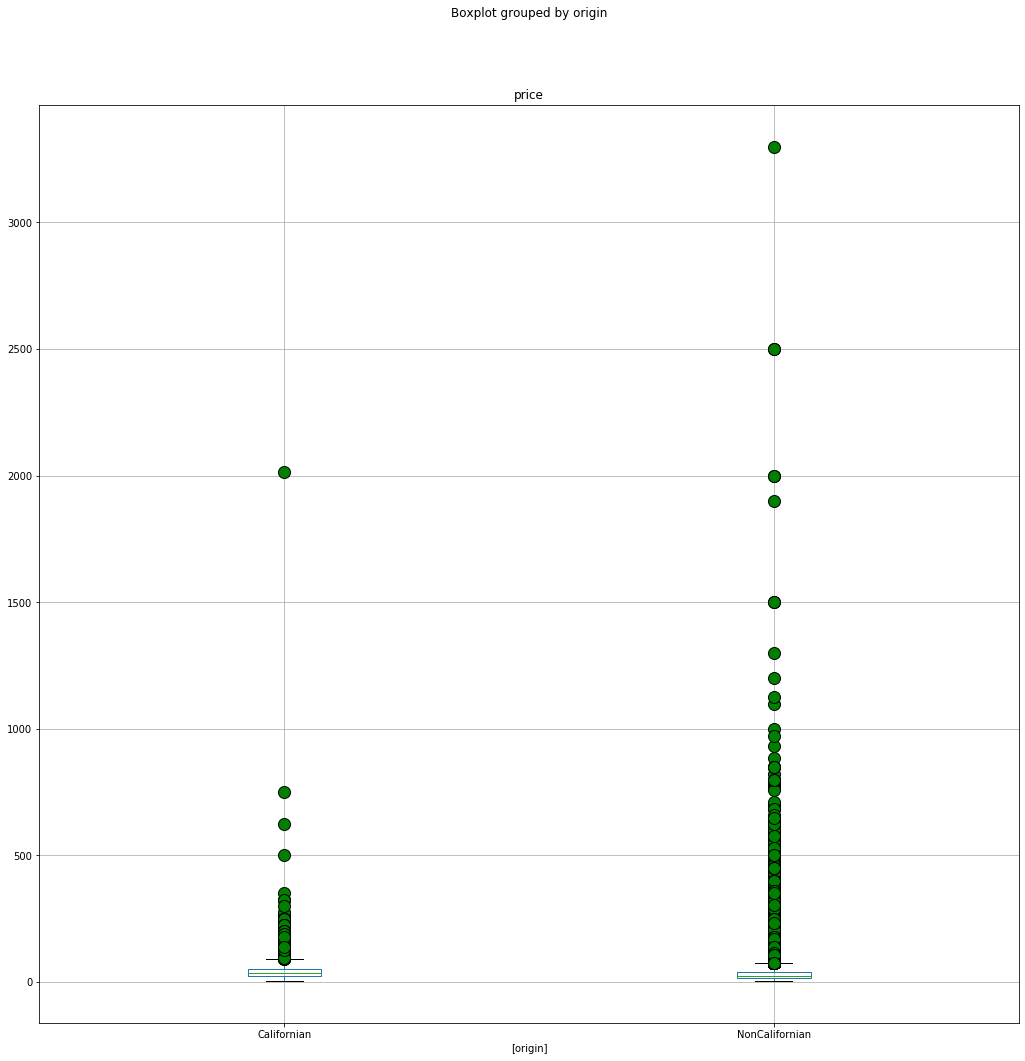

In [39]:
bw_plt_data = []
bw_plt_data = clean_gbl_wines[['price','province']]
bw_plt_data.loc[bw_plt_data['province'] == 'California', 'origin'] = 'Californian'
bw_plt_data.loc[bw_plt_data['province'] != 'California', 'origin'] = 'NonCalifornian'
bw_plt_data

flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

bw_plt_data.boxplot(by="origin", flierprops=flierprops, figsize=(17,17))
#plt.set_title('Wine Origin Price')
#plt.set_ylabel('Price in USD')
plt.show()